<a id = "1"></a>
# 1 - Problem Definition
   On several music platforms, users contribute tags to songs, enhancing their visibility for listeners seeking specific music. These tags often include genre information, but many songs lack adequate tagging, which can lead to increased time and effort for users trying to discover new music. To address this issue, we aim to implement machine learning algorithms to improve the data quality, thereby enhancing the overall user experience.

<b>Our task is here, classifiying  whether given song's genre is progressive rock or pop by its lyrics.</b>

<a id = "2"></a>
# 2 - Importing

<a id = "3"></a>
##  Importing the Libraries

In [54]:
# these will be the libraries we will use
import numpy as np  # Importing NumPy for numerical operations and array manipulation
import pandas as pd  # Importing Pandas for data manipulation and analysis, especially with DataFrames
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting and visualization
import seaborn as sns  # Importing Seaborn for enhanced statistical data visualization
from collections import Counter  # Importing Counter for counting hashable objects
import nltk  # Importing Natural Language Toolkit for text processing and NLP tasks
import os  # Importing os for interacting with the operating system (file handling, etc.)
import re  # Importing re for regular expression operations



<a id = "4"></a>
##  Importing the Data

In [55]:
pip install openpyxl  # Installing openpyxl for reading and writing Excel files (XLSX format)


Note: you may need to restart the kernel to use updated packages.


In [56]:
data = pd.read_excel('selected_songs.xlsx')  # Reading data from an Excel file into a Pandas DataFrame
data  # Displaying the contents of the DataFrame


,genre,lyrics,Artist,Song
0,prog,"I am just a new boy,\nStranger in this town.,\...",Pink Floyd,Young Lust Lyrics
1,prog,"Eins, zwei, drei, alle!,Ooooh You cannot reach...",Pink Floyd,Waiting For The Worms Lyrics
2,prog,"All alone, or in twos,\nThe ones who really lo...",Pink Floyd,Outside The Wall Lyrics
3,prog,"Into the distance a ribbon of black,\nStretche...",Pink Floyd,Learning To Fly Lyrics
4,prog,"You got to be crazy, gotta have a real need,\n...",Pink Floyd,Dogs Lyrics
...,...,...,...,...
825,pop,"I Don't Know,\nThat You Want To Try,\nEvertime...",Michael Jackson,Remember The Time Lyrics
826,pop,"Girl, close your eyes,\nLet that rhythm get in...",Michael Jackson,Rock With You Lyrics
827,pop,"Help,\nI have done it again,\nI have been here...",Sia,Breathe Me Lyrics
828,pop,"Yeah, Rihanna,Good Girl Gone Bad,\nTake three,...",Rihanna,Umbrella Lyrics


In [57]:
data["genre"].unique()  # Extracting the unique genres from the 'genre' column of the DataFrame

array(['prog', 'pop'], dtype=object)

<a id = "3"></a>
# 3 -  PART I : Data Preprocessing

<a id = "6"></a>
## Removing Numbers, Punctuations and Lowercasing the Words

In [58]:
def rid_of_specials(words):
    new = ''  # Initialize an empty string to store cleaned words
    for i in range(len(words)):
        a = re.sub('[^A-Za-z]+', ' ', words[i]).lower()  # Remove non-alphabetic characters and convert to lowercase
        new += a  # Append the cleaned word to the new string
    return new  # Return the concatenated string of cleaned words


<a id = "7"></a>
### a) Removing special characters

In [59]:
data["lyrics"] = data["lyrics"].apply(rid_of_specials)  # Applying the rid_of_specials function to clean the 'lyrics' column
data["lyrics"].head(10)  # Displaying the first 10 rows of the cleaned 'lyrics' column


0    i am just a new boy  stranger in this town   w...
1    eins  zwei  drei  alle  ooooh you cannot reach...
2    all alone  or in twos  the ones who really lov...
3    into the distance a ribbon of black  stretched...
4    you got to be crazy  gotta have a real need  g...
5    long ago and far away in a different age  when...
6    a tiny flame inside my hand  a compromise i ne...
7    i can t see your face  and i can t breathe you...
8    i can t see the meaning of this life i m leadi...
9    out on the road there are fireflies circling  ...
Name: lyrics, dtype: object

In [60]:
data.genre

0      prog
1      prog
2      prog
3      prog
4      prog
       ... 
825     pop
826     pop
827     pop
828     pop
829     pop
Name: genre, Length: 830, dtype: object

<a id = "9"></a>
## Removing Stopwords

In [61]:
data["lyrics"]

0      i am just a new boy  stranger in this town   w...
1      eins  zwei  drei  alle  ooooh you cannot reach...
2      all alone  or in twos  the ones who really lov...
3      into the distance a ribbon of black  stretched...
4      you got to be crazy  gotta have a real need  g...
                             ...                        
825    i don t know  that you want to try  evertime y...
826    girl  close your eyes  let that rhythm get int...
827    help  i have done it again  i have been here m...
828    yeah  rihanna good girl gone bad  take three  ...
829    work  work  work  work  work  work he said me ...
Name: lyrics, Length: 830, dtype: object

In [62]:
import nltk  # Importing the Natural Language Toolkit for NLP tasks
from nltk.corpus import stopwords  # Importing stopwords to filter out common words
from nltk.tokenize import word_tokenize  # Importing word_tokenize for splitting text into words
sw_nltk = (stopwords.words('english'))  # Getting a list of English stopwords from NLTK
stop_words = set(sw_nltk)  # Converting the list of stopwords to a set for efficient lookup


In [63]:
def remove_sw(x):
    x = x.split(' ')  # Splitting the input string into a list of words
    return ' '.join(z for z in x if z not in stop_words)  # Joining words that are not stopwords back into a string

stopped = data["lyrics"].apply(remove_sw)  # Applying the remove_sw function to the 'lyrics' column to filter out stopwords
stopped  # Displaying the cleaned lyrics with stopwords removed


0      new boy  stranger town   good times   gonna sh...
1      eins  zwei  drei  alle  ooooh cannot reach  oo...
2      alone  twos  ones really love  walk outside wa...
3      distance ribbon black  stretched point turning...
4      got crazy  gotta real need  got sleep toes str...
                             ...                        
825    know  want try  evertime see remember  fell lo...
826    girl  close eyes  let rhythm get  try fight  n...
827    help  done  many times  hurt today  worst part...
828    yeah  rihanna good girl gone bad  take three  ...
829    work  work  work  work  work  work said haffi ...
Name: lyrics, Length: 830, dtype: object

<a id = "11"></a>
## Lemmatization

In [64]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [65]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shreni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
from nltk.stem import WordNetLemmatizer
# Step 1
lemmatizer = WordNetLemmatizer()
# Step 2
lemmatized = [lemmatizer.lemmatize(i) for i in stopped]
# Step 3
prepeared_sentence = [''.join(j) for j in lemmatized]
data['Lyrics_Processed'] = prepeared_sentence
data['Lyrics_Processed']

0      new boy  stranger town   good times   gonna sh...
1      eins  zwei  drei  alle  ooooh cannot reach  oo...
2      alone  twos  ones really love  walk outside wa...
3      distance ribbon black  stretched point turning...
4      got crazy  gotta real need  got sleep toes str...
                             ...                        
825    know  want try  evertime see remember  fell lo...
826    girl  close eyes  let rhythm get  try fight  n...
827    help  done  many times  hurt today  worst part...
828    yeah  rihanna good girl gone bad  take three  ...
829    work  work  work  work  work  work said haffi ...
Name: Lyrics_Processed, Length: 830, dtype: object

In [67]:
data

,genre,lyrics,Artist,Song,Lyrics_Processed
0,prog,i am just a new boy stranger in this town w...,Pink Floyd,Young Lust Lyrics,new boy stranger town good times gonna sh...
1,prog,eins zwei drei alle ooooh you cannot reach...,Pink Floyd,Waiting For The Worms Lyrics,eins zwei drei alle ooooh cannot reach oo...
2,prog,all alone or in twos the ones who really lov...,Pink Floyd,Outside The Wall Lyrics,alone twos ones really love walk outside wa...
3,prog,into the distance a ribbon of black stretched...,Pink Floyd,Learning To Fly Lyrics,distance ribbon black stretched point turning...
4,prog,you got to be crazy gotta have a real need g...,Pink Floyd,Dogs Lyrics,got crazy gotta real need got sleep toes str...
...,...,...,...,...,...
825,pop,i don t know that you want to try evertime y...,Michael Jackson,Remember The Time Lyrics,know want try evertime see remember fell lo...
826,pop,girl close your eyes let that rhythm get int...,Michael Jackson,Rock With You Lyrics,girl close eyes let rhythm get try fight n...
827,pop,help i have done it again i have been here m...,Sia,Breathe Me Lyrics,help done many times hurt today worst part...
828,pop,yeah rihanna good girl gone bad take three ...,Rihanna,Umbrella Lyrics,yeah rihanna good girl gone bad take three ...


<a id = "15"></a>
## Vectorization

In [68]:
from sklearn.feature_extraction.text import CountVectorizer  # Importing CountVectorizer for converting text to a matrix of token counts

# Step 1: Initialize the CountVectorizer
vectorizer = CountVectorizer()  

# Step 2: Fit the vectorizer to the prepared sentences and transform them into a document-term matrix
X = vectorizer.fit_transform(prepeared_sentence)  

# Step 3: Retrieve the feature names (unique words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()  

# Step 4: Convert the document-term matrix to a DataFrame for easier analysis, using feature names as columns
lyrics_vectorized = pd.DataFrame(X.toarray(), columns=feature_names)  


In [69]:
lyrics_vectorized

,aa,aaa,aaaaaaaaah,aaaaaaaah,aaaah,aaah,aah,aahh,aaow,abandon,...,zen,zeus,zig,zip,zombies,zone,zoning,zoo,zwei,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.feature_extraction.text import TfidfTransformer  # Importing TfidfTransformer for converting counts to TF-IDF representation
tfidfconverter = TfidfTransformer()  # Initializing the TF-IDF converter
# Fitting the TF-IDF converter to the document-term matrix X and transforming it into a TF-IDF matrix
X = tfidfconverter.fit_transform(X).toarray()  
X  # Displaying the resulting TF-IDF matrix


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06641278,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [71]:
X.shape

(830, 8988)

<a id = "19"></a>
## Target Preperation

In [73]:
# our genre column of 2 unique variables
data.genre

0      prog
1      prog
2      prog
3      prog
4      prog
       ... 
825     pop
826     pop
827     pop
828     pop
829     pop
Name: genre, Length: 830, dtype: object

In [74]:
# we assign numerical values 1 and 0 to genres "prog" and "pop", respectively.
genre_array = data.genre.map({"prog":1, "pop":0})
genre_array

0      1
1      1
2      1
3      1
4      1
      ..
825    0
826    0
827    0
828    0
829    0
Name: genre, Length: 830, dtype: int64

In [75]:
lyrics_vectorized

,aa,aaa,aaaaaaaaah,aaaaaaaah,aaaah,aaah,aah,aahh,aaow,abandon,...,zen,zeus,zig,zip,zombies,zone,zoning,zoo,zwei,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id = "20"></a>
# 4 : Exploratory Data Analysis

<a id = "21"></a>
## General Attributes of Songs & Lyrics

<Axes: >

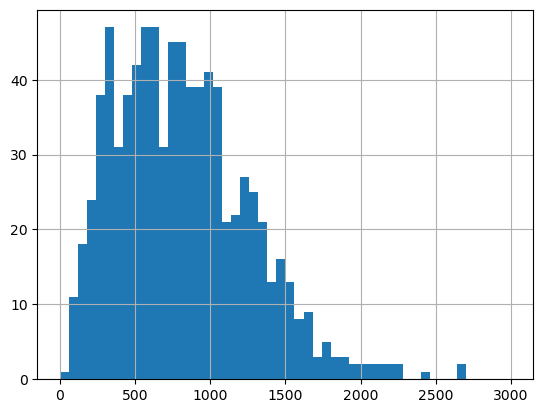

In [28]:
# step 1

data['Lyrics_Processed'].str.len().hist(bins=50, range = (0,3000))

This histogram shows us that the amount of **characters** in song lyrics are mostly in the range of ~(300 - 1200)

<Axes: >

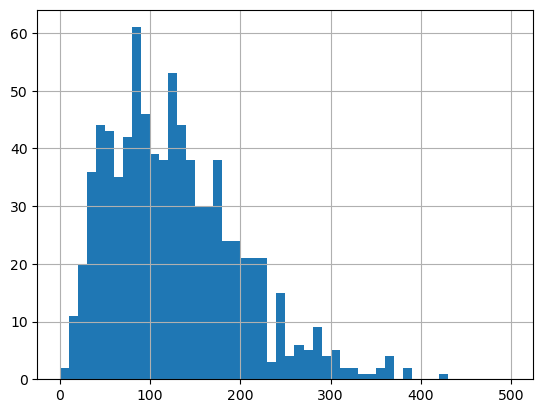

In [29]:
# step 2

data['Lyrics_Processed'].str.split().\
    map(lambda x: len(x)).\
    hist(bins=50, range = (0,500))

This histogram on the other hand, shows us that the amount of **words** in songs are mostly in the range of ~(30 - 200)

Note that we have already removed stop words.

<Axes: >

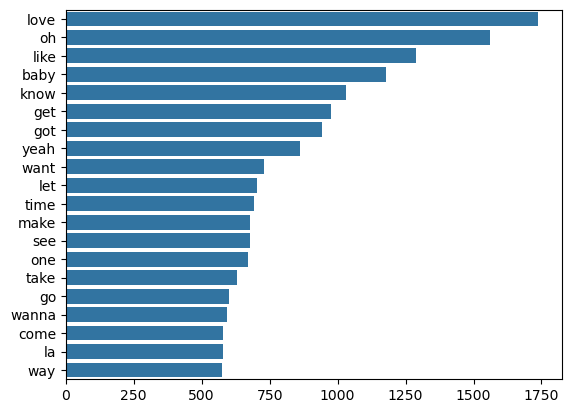

In [30]:
# step 3

corpus=[]
new= data['Lyrics_Processed'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<a id = "22"></a>
## Using Ngrams

<a id = "23"></a>
### a) Creating variables for lyrics of each genre

Before we continue on with more EDA, we'd like to assign two matrices of words to each genre, so we can work easier with these new variables.


In [31]:
# we see that 412th row is the last progressive rock row.
# 412 was found with trial and error in minimal amount of time.

print(data.genre[412])
print(data.genre[413])

prog
pop


In [32]:
 # creating a variable for rock lyrics, then assigning the "Lyrics Processed" column's rock lyric parts to it.

rock_lyrics = data['Lyrics_Processed'][0:413]
rock_lyrics

0      new boy  stranger town   good times   gonna sh...
1      eins  zwei  drei  alle  ooooh cannot reach  oo...
2      alone  twos  ones really love  walk outside wa...
3      distance ribbon black  stretched point turning...
4      got crazy  gotta real need  got sleep toes str...
                             ...                        
408    beyond horizon place lived young  world magnet...
409    mother  think drop bomb   mother  think like s...
410     yes   stand still laddy   grew went school  c...
411     look mummy   aeroplane sky   ooo ooo ooo ooo ...
412    shall use fill empty   spaces used talk    sha...
Name: Lyrics_Processed, Length: 413, dtype: object

In [33]:
# same process, now for pop lyrics.

pop_lyrics = data['Lyrics_Processed'][413:829]
pop_lyrics

413    leaves brown sky gray   walk winter day   safe...
414    terrify  cuz man  boy  got power  treat like t...
415    naku penda piya naku taka piya mpenziwe  love ...
416    news today  strange weird fact file   singer m...
417    seen world  done  cake  diamonds  brilliant  b...
                             ...                        
824    took baby saturday bang  boy girl   yes  one  ...
825    know  want try  evertime see remember  fell lo...
826    girl  close eyes  let rhythm get  try fight  n...
827    help  done  many times  hurt today  worst part...
828    yeah  rihanna good girl gone bad  take three  ...
Name: Lyrics_Processed, Length: 416, dtype: object

<a id = "24"></a>
### b) Visualizing & analyzing ngrams

In [34]:
def get_top_ngram(corpus, n=None):
    # Create a CountVectorizer to extract n-grams of specified size from the corpus
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)  
    
    # Transform the corpus into a document-term matrix for n-grams
    bag_of_words = vec.transform(corpus)  
    
    # Sum the occurrences of each n-gram across all documents
    sum_words = bag_of_words.sum(axis=0)  
    
    # Create a list of tuples containing n-grams and their corresponding frequencies
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]  
    
    # Sort the list of n-grams by frequency in descending order
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)  
    
    # Return the top 10 n-grams based on frequency
    return words_freq[:10]  


<Axes: >

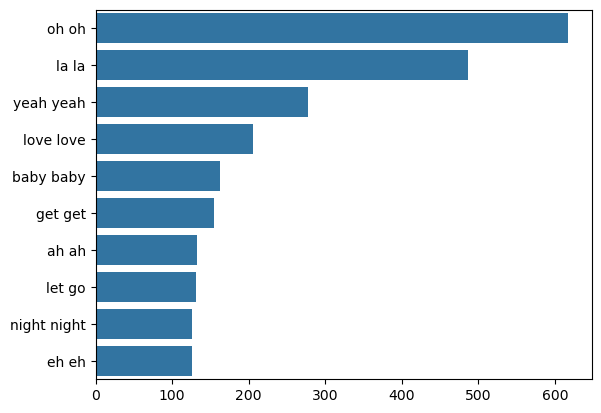

In [35]:
# top 10 bigrams for all lyrics

top_n_bigrams=get_top_ngram(data['Lyrics_Processed'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<Axes: >

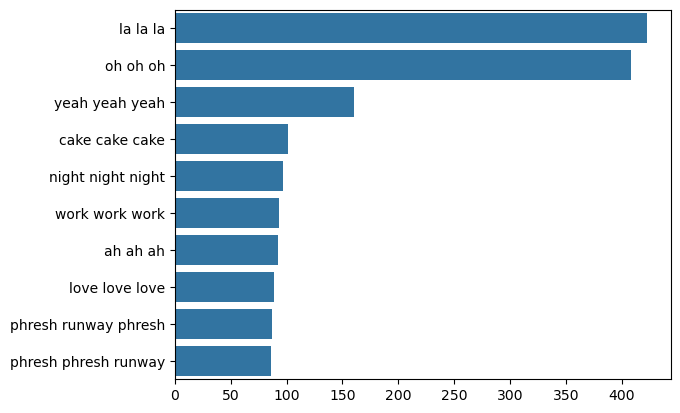

In [36]:
# many repetitions for total of both genres, even when n = 3

top_tri_grams=get_top_ngram(data['Lyrics_Processed'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<Axes: >

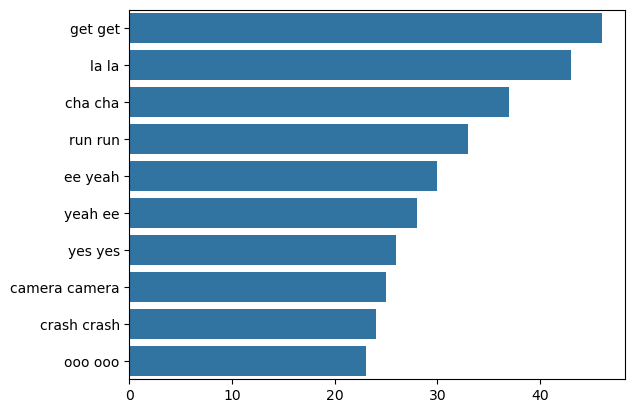

In [37]:
# top 10 bigrams for rock lyrics

top_n_bigrams=get_top_ngram(rock_lyrics,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<Axes: >

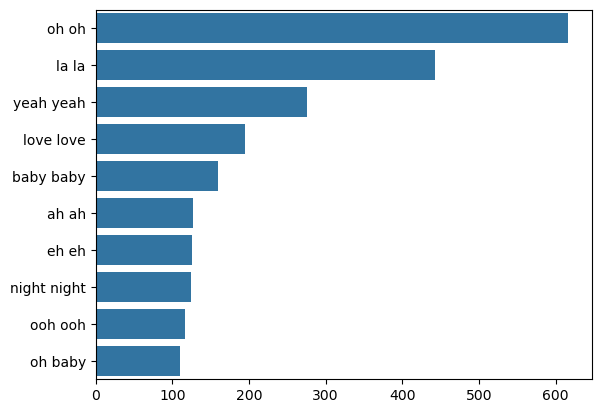

In [38]:
top_n_bigrams=get_top_ngram(pop_lyrics,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<Axes: >

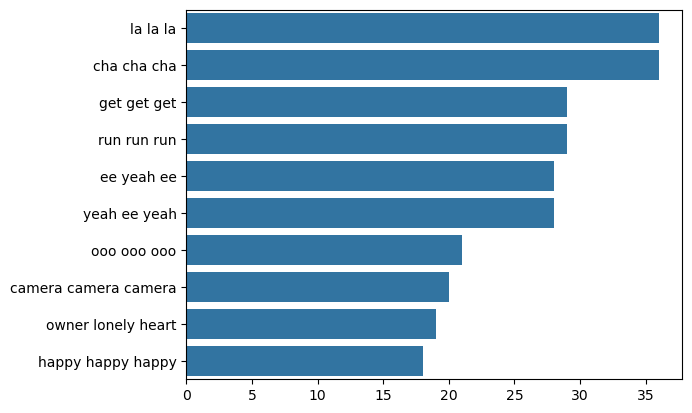

In [39]:
# top 10 trigrams for rock lyrics

top_tri_grams=get_top_ngram(rock_lyrics,n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<Axes: >

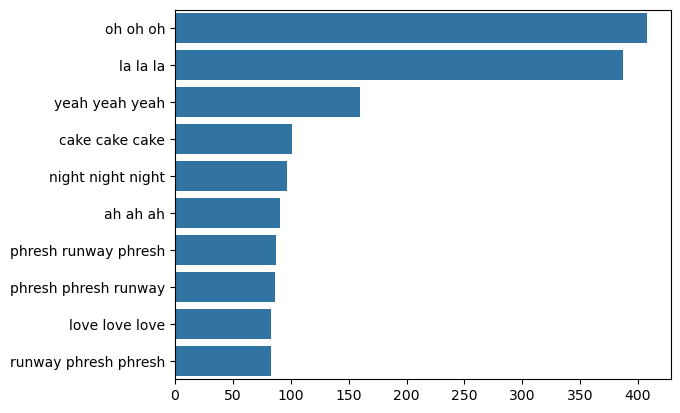

In [40]:
top_tri_grams=get_top_ngram(pop_lyrics,n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<a id = "26"></a>

## Sentiment analysis

In [ ]:
from textblob import TextBlob  # Importing TextBlob for sentiment analysis

def polarity(text):
    # Calculate and return the polarity score of the input text using TextBlob
    return TextBlob(text).sentiment.polarity  

# Apply the polarity function to the 'Lyrics_Processed' column and store the results in a new column 'polarity_score'
data['polarity_score'] = data['Lyrics_Processed'].apply(lambda x: polarity(x))  

# Create a histogram to visualize the distribution of polarity scores
data['polarity_score'].hist()  


In [ ]:
# We have a pretty normally distributed polarity score,
# which means that these genres in total are neutral in feelings overall

In [ ]:
# polarity of pop lyrics

data['polarity_score']=pop_lyrics.\
   apply(lambda x : polarity(x))
data['polarity_score'].hist()

In [ ]:
# polarity of rock lyrics


data['polarity_score']=rock_lyrics.\
   apply(lambda x : polarity(x))
data['polarity_score'].hist()

Looking at these three histograms, we can deduce:
- Overall average polarity score is between (0.0 - 0.20)
- Pop lyrics' polarity score is between (0.10 - 0.20)
- Rock lyrics' polarity score is between (-0.05 - 0.15)

Which means rock lyrics have a slightly more negative score than pop lyrics

But overall, both genres seem to have a more positive score than neutral.

In [ ]:
data

<a id = "27"></a>
# 5 : Feature Creation & Selection

<a id = "31"></a>
### Performing feature selection/elimination

In [76]:
# we only need these columns

data[["genre", "Lyrics_Processed"]]

,genre,Lyrics_Processed
0,prog,new boy stranger town good times gonna sh...
1,prog,eins zwei drei alle ooooh cannot reach oo...
2,prog,alone twos ones really love walk outside wa...
3,prog,distance ribbon black stretched point turning...
4,prog,got crazy gotta real need got sleep toes str...
...,...,...
825,pop,know want try evertime see remember fell lo...
826,pop,girl close eyes let rhythm get try fight n...
827,pop,help done many times hurt today worst part...
828,pop,yeah rihanna good girl gone bad take three ...


In [77]:
data.columns

Index(['genre', 'lyrics', 'Artist', 'Song', 'Lyrics_Processed'], dtype='object')

<a id = "32"></a>
# 6 : Train - Test Splitting

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, genre_array, test_size=0.2, random_state=0)

<a id = "33"></a>
# 7 : Modelling

<a id = "34"></a>
## Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [47]:
print("Naive Bayes Score: ", nb.score(X_test,y_test) )

Naive Bayes Score:  0.7831325301204819


<a id = "35"></a>
## Decision Trees

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [49]:
print("Decision Tree Score: ", dt.score(X_test,y_test) )

Decision Tree Score:  0.8554216867469879


<a id = "36"></a>
## Random Forest Algorithm

In [50]:
 from sklearn.ensemble import RandomForestClassifier     # Importing the Random Forest classifier
    
classifier = RandomForestClassifier(n_estimators=550, max_depth=300, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=300, n_estimators=550, random_state=0)

In [51]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Importing the Random Forest classifier
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning

# Defining the model
classifier = RandomForestClassifier(random_state=0)

# Setting up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 550],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50, 100, 300],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Setting up GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)  # 5-fold cross-validation

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

# Displaying the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Creating a new classifier with the best parameters
best_classifier = grid_search.best_estimator_


Fitting 5 folds for each of 1134 candidates, totalling 5670 fits


<a id = "37"></a>
# 7 : Model Evaluation

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[81  4]
 [10 71]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        85
           1       0.95      0.88      0.91        81

    accuracy                           0.92       166
   macro avg       0.92      0.91      0.92       166
weighted avg       0.92      0.92      0.92       166

0.9156626506024096


In [53]:
print("Naive Bayes Score: ", nb.score(X_test,y_test) )
print("Decision Tree Score: ", dt.score(X_test,y_test) )
print("Random Forest Score: ",accuracy_score(y_test, y_pred))

Naive Bayes Score:  0.7831325301204819
Decision Tree Score:  0.8554216867469879
Random Forest Score:  0.9156626506024096


~ 0.91, 0.82, 0.9 are the accuracy scores for our prediction, using Naive Bayes, Decision Tree and Random Forest respectively.

Using Random Forest Classifier, our precision, f1-score and accuracy are all above 0.90. 